In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import hilbert
from scipy.stats import norm
from scipy.stats import chi2
from decimal import Decimal
import csv

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

def format_plt(n):
    a = '%e' % Decimal(n)
    return r'${'+a.split('e')[0].rstrip('0').rstrip('.')+'}}$'+r'${*10^{'+a.split('e')[1]+'}}$'

In [2]:
def gaussian(x, y, mu, sig):
    return norm.pdf(x, mu, sig)*y

In [3]:
#Messwerte aus Tabelle 1: s_a, s_e und m
s_a = np.array([1.000,3.957,1.000,3.957,1.000]) *1e-3# Startposition [m]
Fehler_s_a = np.array([0.009,0.009,0.009,0.009,0.009]) *1e-3

s_e = np.array([3.957,1.000,3.957,1.000,3.958]) *1e-3# Endposition [m]
Fehler_s_e = np.array([0.009,0.009,0.009,0.009,0.009]) *1e-3

m = np.array([11092,11121,11121,11122,11122]) # Anzahl der Impulse
Fehler_m = np.array([2,2,2,2,2])

Wellenlänge:
lambda [m] = 5.320805e-07  +-  2.750607e-10
Chi-Quadrat = 0.28801824173344576
Freiheitsgrade = 4
Chi-Quadrat reduziert = 0.07200456043336144
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 99.0 %


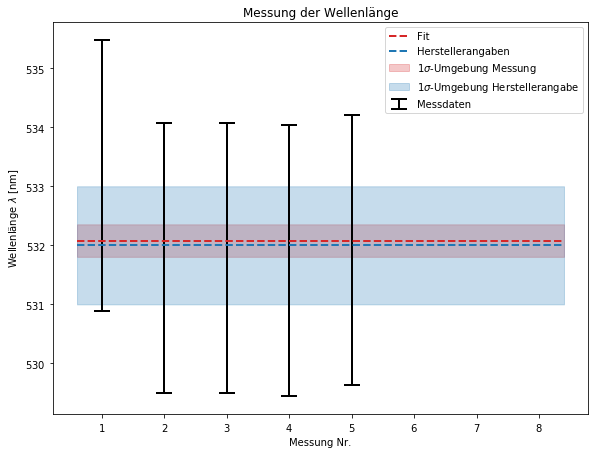

In [4]:
#Aufgabe 2

lamda = 2*np.abs(s_e-s_a)/m
Fehler_lamda = lamda*np.sqrt((np.sqrt(Fehler_s_a**2+Fehler_s_e**2)/(s_a-s_e))**2+(Fehler_m/m)**2)

#Nummerierung
n = np.linspace(1,lamda.size,lamda.size)
Fehler_n = 1e-12

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (c) = p # c: Konstante
    return x*0+c

model = odr.Model(fit_func)

#darzustellende Daten
x = n
y = lamda
delta_x = Fehler_n
delta_y = Fehler_lamda

#Startparameter
para0 = [0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+3+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
y_scale = 1e9
fig, ax = plt.subplots(1, figsize=[6.4 * 1.5, 4.8 * 1.5])
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.title('Messung der Wellenlänge')
plt.errorbar(x, y*y_scale, yerr=delta_y*y_scale, lw=2, ecolor='k', fmt='none', capsize=8, capthick=2, label='Messdaten')
plt.plot(x_fit, fit*y_scale, 'C3--', lw=2, label='Fit')
plt.plot(x_fit, fit*0+532, 'C0--', lw=2, label='Herstellerangaben')
ax.fill_between(x_fit, fit_top*y_scale, fit_bot*y_scale, color='C3', alpha=.25, label=str(nstd)+'$\sigma$-Umgebung Messung')
ax.fill_between(x_fit, fit_bot*0+532+1, fit_bot*0+532-1, color='C0', alpha=.25, label='1$\sigma$-Umgebung Herstellerangabe')
plt.xlabel('Messung Nr.')
plt.ylabel('Wellenlänge $\lambda$ [nm]')
plt.legend(loc='best')

fig.savefig('figures/232_Fig1.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
lamda_mean = popt[0]
Fehler_lamda_mean = perr[0]

#Ausgabe
print('Wellenlänge:')
print('lambda [m] =', format_e(lamda_mean), ' +- ', format_e(Fehler_lamda_mean))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

In [5]:
#Messwerte aus Tabelle 2: s_a, s_e und m

m_1 = np.array([0,10,15,20,25,30,35,40,45,50,55]) # Anzahl der Ringe, 1.Messreihe
Fehler_m_1 = np.array([2,2,2,2,2,2,2,2,2,2,2])

m_2 = np.array([0,10,15,20,25,30,35,40,45,50]) +10 # Anzahl der Ringe, 2.Messreihe
Fehler_m_2 = np.array([2,2,2,2,2,2,2,2,2,2])

m_3 = np.array([0,10,15,20,25,30,35,40,45,50]) +20 # Anzahl der Ringe, 3.Messreihe
Fehler_m_3 = np.array([2,2,2,2,2,2,2,2,2,2])

p_1 = np.array([-743,-670,-595,-515,-440,-365,-290,-200,-135,-55,0]) *(101325/760)# Druck, 1.Messreihe
Fehler_p_1 = np.array([5,5,5,5,5,5,5,5,5,5,5]) *(101325/760)

p_2 = np.array([-744,-665,-590,-525,-440,-360,-290,-215,-140,-60]) *(101325/760)# Druck, 2.Messreihe
Fehler_p_2 = np.array([5,5,5,5,5,5,5,5,5,5]) *(101325/760)

p_3 = np.array([-745,-670,-595,-515,-440,-365,-290,-213,-155,-60]) *(101325/760)# Druck, 3.Messreihe
Fehler_p_3 = np.array([5,5,5,5,5,5,5,5,5,5]) *(101325/760)

T = 23.8 +273.15 # Raumtemperatur [K]
Fehler_T = 0.2

p_0 = 101325 # Normalbedingungen
T_0 = 273.15

a = 50 *1e-3 # Innemaß der Küvette [m]
Fehler_a = 0.05 *1e-3



Steigungen: 
S_1 [1/Pa] = 5.171621e-04  +-  1.381281e-05
Chi-Quadrat = 4.683194878533262
Freiheitsgrade = 10
Chi-Quadrat reduziert = 0.4683194878533262
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 91.0 %


S_2 [1/Pa] = 5.224287e-04  +-  1.573935e-05
Chi-Quadrat = 4.042295670064589
Freiheitsgrade = 9
Chi-Quadrat reduziert = 0.4491439633405099
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 91.0 %


S_3 [1/Pa] = 5.248941e-04  +-  1.589545e-05
Chi-Quadrat = 4.0828271812786445
Freiheitsgrade = 9
Chi-Quadrat reduziert = 0.45364746458651606
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 91.0 %


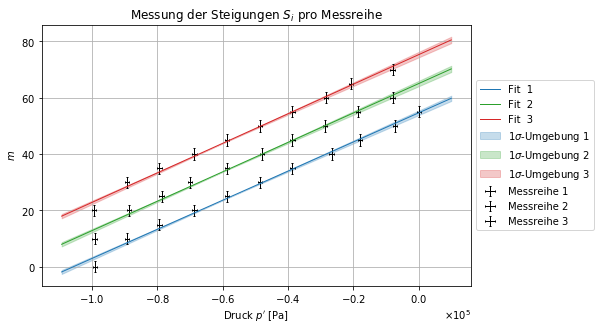

In [6]:
#Aufgabe 3

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (s, c) = p #s: Steigung, c: Startwert
    return s*x+c

model = odr.Model(fit_func)

#darzustellende Daten
x_1 = p_1
y_1 = m_1
delta_x_1 = Fehler_p_1
delta_y_1 = Fehler_m_1

x_2 = p_2
y_2 = m_2
delta_x_2 = Fehler_p_2
delta_y_2 = Fehler_m_2

x_3 = p_3
y_3 = m_3
delta_x_3 = Fehler_p_3
delta_y_3 = Fehler_m_3

#Startparameter
para0 = [0, 0]

data_1 = odr.RealData(x_1, y_1, sx=delta_x_1, sy=delta_y_1)
odr_1 = odr.ODR(data_1, model, beta0=para0 )
out_1 = odr_1.run()

data_2 = odr.RealData(x_2, y_2, sx=delta_x_2, sy=delta_y_2)
odr_2 = odr.ODR(data_2, model, beta0=para0 )
out_2 = odr_2.run()

data_3 = odr.RealData(x_3, y_3, sx=delta_x_3, sy=delta_y_3)
odr_3 = odr.ODR(data_3, model, beta0=para0 )
out_3 = odr_3.run()

#1-Sigma
popt_1 = out_1.beta
perr_1 = out_1.sd_beta

popt_2 = out_2.beta
perr_2 = out_2.sd_beta

popt_3 = out_3.beta
perr_3 = out_3.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top_1 = popt_1+nstd*perr_1
popt_bot_1 = popt_1-nstd*perr_1

popt_top_2 = popt_2+nstd*perr_2
popt_bot_2 = popt_2-nstd*perr_2

popt_top_3 = popt_3+nstd*perr_3
popt_bot_3 = popt_3-nstd*perr_3

#Plot-Umgebung
x_fit = np.linspace(min(min(x_1),min(x_2),min(x_3))*1.1, min(min(x_1),min(x_2),min(x_3))*(-0.1), 1000)

fit_1 = fit_func(popt_1, x_fit)
fit_top_1 = fit_func(popt_top_1, x_fit)
fit_bot_1 = fit_func(popt_bot_1, x_fit)

fit_2 = fit_func(popt_2, x_fit)
fit_top_2 = fit_func(popt_top_2, x_fit)
fit_bot_2 = fit_func(popt_bot_2, x_fit)

fit_3 = fit_func(popt_3, x_fit)
fit_top_3 = fit_func(popt_top_3, x_fit)
fit_bot_3 = fit_func(popt_bot_3, x_fit)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 *1.5, 4.8])
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.errorbar(x_1, y_1, yerr=delta_y_1, xerr=delta_x_1, lw=1, ecolor='k', fmt='none', capsize=1, label='Messreihe 1')
plt.errorbar(x_2, y_2, yerr=delta_y_2, xerr=delta_x_2, lw=1, ecolor='k', fmt='none', capsize=1, label='Messreihe 2')
plt.errorbar(x_3, y_3, yerr=delta_y_3, xerr=delta_x_3, lw=1, ecolor='k', fmt='none', capsize=1, label='Messreihe 3')
plt.title('Messung der Steigungen $S_i$ pro Messreihe')
plt.grid(True)
plt.xlabel('Druck $p\' $ [Pa]')
plt.ylabel('$m$')
plt.plot(x_fit, fit_1, color='C0', lw=1, label='Fit  1')
plt.plot(x_fit, fit_2, color='C2', lw=1, label='Fit  2')
plt.plot(x_fit, fit_3, color='C3', lw=1, label='Fit  3')
ax.fill_between(x_fit, fit_top_1, fit_bot_1, color='C0', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 1')
ax.fill_between(x_fit, fit_top_2, fit_bot_2, color='C2', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 2')
ax.fill_between(x_fit, fit_top_3, fit_bot_3, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 3')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('figures/232_Fig2.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof_1 = x_1.size-popt.size
chisquare_1 = out_1.sum_square
chisquare_red_1 = chisquare_1/dof_1
prob_1 = round(1-chi2.cdf(chisquare_1,dof_1),2)*100

dof_2 = x_2.size-popt.size
chisquare_2 = out_2.sum_square
chisquare_red_2 = chisquare_2/dof_2
prob_2 = round(1-chi2.cdf(chisquare_2,dof_2),2)*100

dof_3 = x_3.size-popt.size
chisquare_3 = out_3.sum_square
chisquare_red_3 = chisquare_3/dof_3
prob_3 = round(1-chi2.cdf(chisquare_3,dof_3),2)*100

#Auswertung
S_1 = popt_1[0]
Fehler_S_1 = perr_1[0]
S_2 = popt_2[0]
Fehler_S_2 = perr_2[0]
S_3 = popt_3[0]
Fehler_S_3 = perr_3[0]

#Ausgabe
print('Steigungen: ')
print('S_1 [1/Pa] =', format_e(S_1), ' +- ', format_e(Fehler_S_1))
print('Chi-Quadrat =', chisquare_1)
print('Freiheitsgrade =', dof_1)
print('Chi-Quadrat reduziert =', chisquare_red_1)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_1, '%')
print('\n')
print('S_2 [1/Pa] =', format_e(S_2), ' +- ', format_e(Fehler_S_2))
print('Chi-Quadrat =', chisquare_2)
print('Freiheitsgrade =', dof_2)
print('Chi-Quadrat reduziert =', chisquare_red_2)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_2, '%')
print('\n')
print('S_3 [1/Pa] =', format_e(S_3), ' +- ', format_e(Fehler_S_3))
print('Chi-Quadrat =', chisquare_3)
print('Freiheitsgrade =', dof_3)
print('Chi-Quadrat reduziert =', chisquare_red_3)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_3, '%')

Brechungsindex:
n_0 = 1.000305408726061  +-  1.373427e-06
Chi-Quadrat = 0.14505393435938296
Freiheitsgrade = 2
Chi-Quadrat reduziert = 0.07252696717969148
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 93.0 %


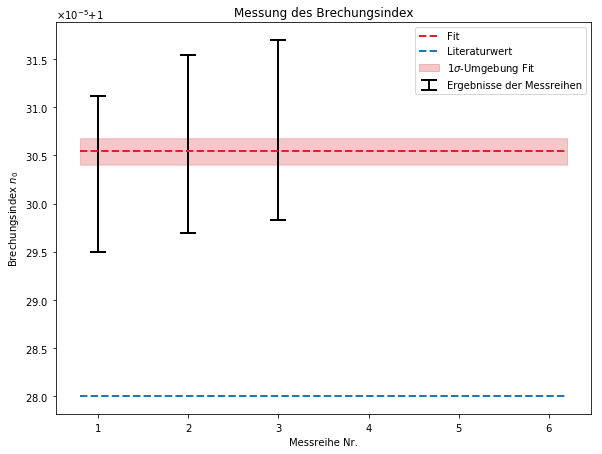

In [7]:
S = np.array([S_1,S_2,S_3])
Fehler_S = np.array([Fehler_S_1,Fehler_S_2,Fehler_S_3])

n_0 = 1+lamda_mean*S*p_0*T/(2*a*T_0)
Fehler_n_0 = lamda_mean*S*p_0*T/(2*a*T_0)*np.sqrt((Fehler_lamda_mean/lamda_mean)**2+(Fehler_S/S)**2
                                                       +(Fehler_T/T)**2+(Fehler_a/a)**2)

#Nummerierung
N = np.linspace(1,S.size,S.size)
Fehler_N = 1e-12

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (c) = p # c: Konstante
    return x*0+c

model = odr.Model(fit_func)

#darzustellende Daten
x = N
y = n_0
delta_x = Fehler_N
delta_y = Fehler_n_0

#Startparameter
para0 = [0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+3+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 * 1.5, 4.8 * 1.5])
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.title('Messung des Brechungsindex')
plt.errorbar(x, y, yerr=delta_y, lw=2, ecolor='k', fmt='none', capsize=8, capthick=2, label='Ergebnisse der Messreihen')
plt.plot(x_fit, fit, 'C3--', lw=2, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+'$\sigma$-Umgebung Fit')
plt.plot(x_fit, fit*0+1.00028, 'C0--', lw=2, label='Literaturwert')
plt.xlabel('Messreihe Nr.')
plt.ylabel('Brechungsindex $n_0$')
plt.legend(loc='best')

fig.savefig('figures/232_Fig3.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
n_0_mean = popt[0]
Fehler_n_0_mean = perr[0]

#Ausgabe
print('Brechungsindex:')
print('n_0 =', n_0_mean, ' +- ', format_e(Fehler_n_0_mean))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Anzahl der Messungen =  2500
Normalverteilung:
mu = 3.973149e-07 m
sigma = 1.392349e-06 m
FWHM = 3.278981e-06 m


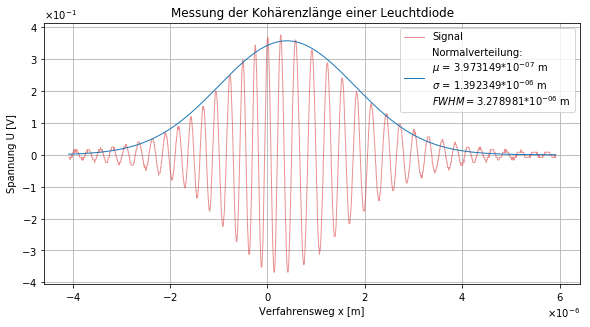

In [8]:
#Aufgabe 4

v_Verfahren = 0.1 *1e-3 # Verfahrensgeschsindigkeit [m / s]

#Messwerte aus Datei 2: V über t
t = np.array([])
V = np.array([])
with open('data\Messung2\Messung2_CH1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        t = np.append(t,float(row[3]))
        V = np.append(V,float(row[4]))

x = t*v_Verfahren

analytic_signal = hilbert(V)
amplitude_envelope = np.abs(analytic_signal)

fitParams, fitCovariances = curve_fit(gaussian, t, amplitude_envelope)
mu = fitParams[1]*v_Verfahren
sigma = fitParams[2]*v_Verfahren

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 *1.5, 4.8])
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.plot(x, V, lw=1, color='C3', marker='', alpha=.50, label='Signal')
plt.plot(x,gaussian(t,*fitParams),  lw=1, color='C0', label='Normalverteilung:\n'
         +r'${\mu}$'+' = '+str(format_plt(mu))+' m\n'
         +r'${\sigma}$'+' = '+str(format_plt(sigma))+' m\n'
         +r'$FWHM = $'+format_plt(sigma*2.355)+' m')
plt.title('Messung der Kohärenzlänge einer Leuchtdiode')
plt.ylabel('Spannung U [V]')
plt.xlabel('Verfahrensweg x [m]')
plt.grid(True)
plt.legend(loc='best')

fig.savefig('figures/232_Fig4.pdf', format='pdf', bbox_inches='tight')

#Auswertung
counts = t.size

#Ausgabe
print('Anzahl der Messungen = ', counts)
print('Normalverteilung:\n'
         +'mu = '+str(format_e(mu))+' m\n'
         +'sigma = '+str(format_e(sigma))+' m\n'
         +'FWHM = '+format_e(sigma*2.355)+' m')